In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
# import swifter
import gc
from Bio import SeqIO
import seaborn as sn

# import swifter
import gc
import timeit

from Bio import SeqIO
import time
%matplotlib inline
import pickle
from tqdm.auto import tqdm

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

In [2]:
gc.enable()
# gc.disable()

# Import Labels

60000

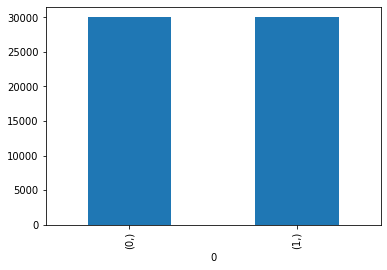

In [3]:
###############################################################################
#                     Import the Labels and plot their dist                    #
###############################################################################
labels = []
def importLabels():
#     with open('./Data/shortlabels.txt', 'r') as filehandle:
    with open('./Data/labels.txt', 'r') as filehandle:


        for line in filehandle:
            # remove linebreak, if exists, which is the last character of the string
            if(line[-1] == "\n"):
                currentPlace = line[:-1]
            else:
                currentPlace = line[:]
            # add item to the list
            labels.append(currentPlace)
importLabels()
DataFrame(labels).value_counts().sort_index().plot.bar()
len(labels)

## Read data from disk 1 (raw data) or 2(numerical representation sequences)

## 1

In [4]:
###############################################################################
#                             Import the Fasta Sequences                      #
###############################################################################
from Bio import SeqIO
chromid = []
chromseq = []
for sample in SeqIO.parse('./Data/sequences.fasta', "fasta"):
    chromid.append(sample.id)
    chromseq.append(str(sample.seq))
    
    
shortest =  min(chromseq, key=len)
longest =  max(chromseq, key=len)
print("length of shortest sequence : " + str(len(shortest)))
print("length of longest sequence : " + str(len(longest)))


length of shortest sequence : 5000
length of longest sequence : 14999


## 2

In [6]:
with open('./LstmData/numSeq.pkl','rb') as f:
    sequences = pickle.load(f)


In [5]:
###############################################################################
#            Extract the lengths of sequences to analyse the data             #
###########k####################################################################
chrom = pd.DataFrame(chromseq,columns=['seq'])
lengths = chrom.apply(lambda x: x.str.len())
lengths = lengths.rename(columns={"seq": "len"})# 

###############################################################################
#                   Extract the lengths of each class                         #
###############################################################################
# lengths.insert(1, "label", labels)
# len0 = lengths[lengths['label'] == "0"]
# len1 = lengths[lengths['label'] == "1"]


# len1 = len1.sort_values(by=['len'])
# len1 = len1.reset_index()
# len1 = len1.drop(['index'], axis=1)
# len1 = len1.reset_index()


# len0 = len0.sort_values(by=['len'])
# len0 = len0.reset_index()
# len0 = len0.drop(['index'], axis=1)
# len0 = len0.reset_index()


C:\Users\Bassem new\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


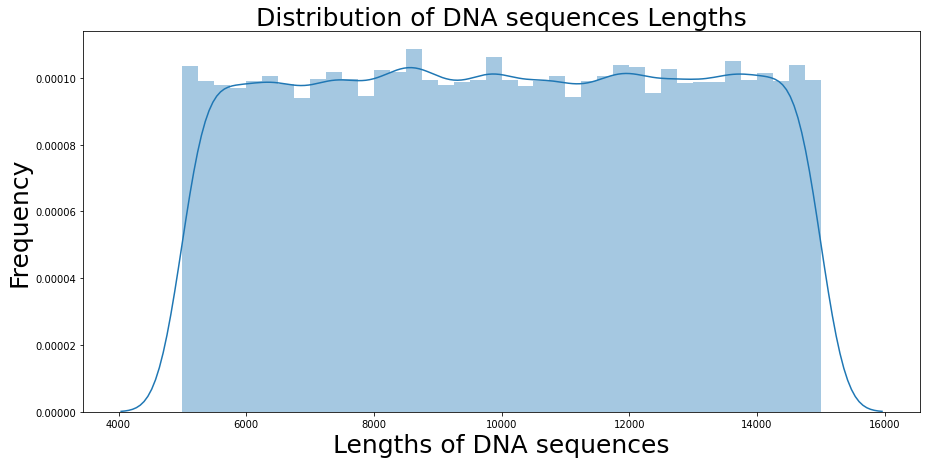

In [10]:
plt.figure(figsize=(15,7))
sns.distplot(lengths)
plt.title("Distribution of DNA sequences Lengths", fontsize = 25)
plt.xlabel("Lengths of DNA sequences", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

plt.show()

C:\Users\Bassem new\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

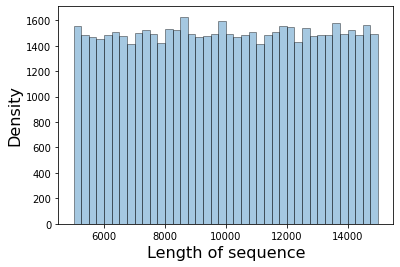

In [13]:
###############################################################################
#                   Distribution Histogram and Density                        #
###############################################################################
ran = np.arange(len(shortest),len(longest),100 )
# ax1 = lengths.plot.density(x='index', y='len', c='DarkBlue', bw_method='silverman', ind=ran, figsize=(10,5))
ax1=sns.distplot(x=lengths['len'], hist=True, kde=False,bins=40, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_xlabel("Length of sequence",fontdict={'fontsize':16})
ax1.set_ylabel("Density",fontdict={'fontsize':16})

Text(0, 0.5, 'Counts')

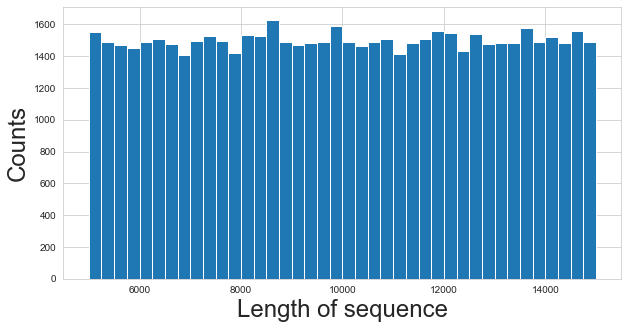

In [41]:
# lengths['len'].hist(bins=60, figsize=(10,5), ylabel="number of sequences")
ax = lengths['len'].plot(kind='hist',bins=40, figsize=(10,5))
ax.set_xlabel("Length of sequence",fontdict={'fontsize':24})
ax.set_ylabel("Counts",fontdict={'fontsize':24})

<AxesSubplot:xlabel='len', ylabel='Proportion'>

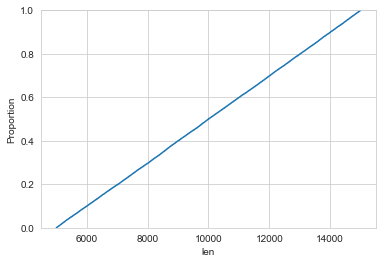

In [42]:
###############################################################################
#                    ECDF Plot: Visual normality test                         #
###############################################################################
a = lengths['len']
sns.ecdfplot(data=a)

In [43]:
###############################################################################
#        Statistical Distribution Test: D'Agostino and Pearson's Test         #
###############################################################################


from scipy.stats import normaltest
data = lengths

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p >alpha:  # null hypothesis: x comes from a normal distribution
    print("Data is probably Gaussian")
else:
    print("Data is probably not Gaussian")


Statistics=51649.658, p=0.000
Data is probably not Gaussian


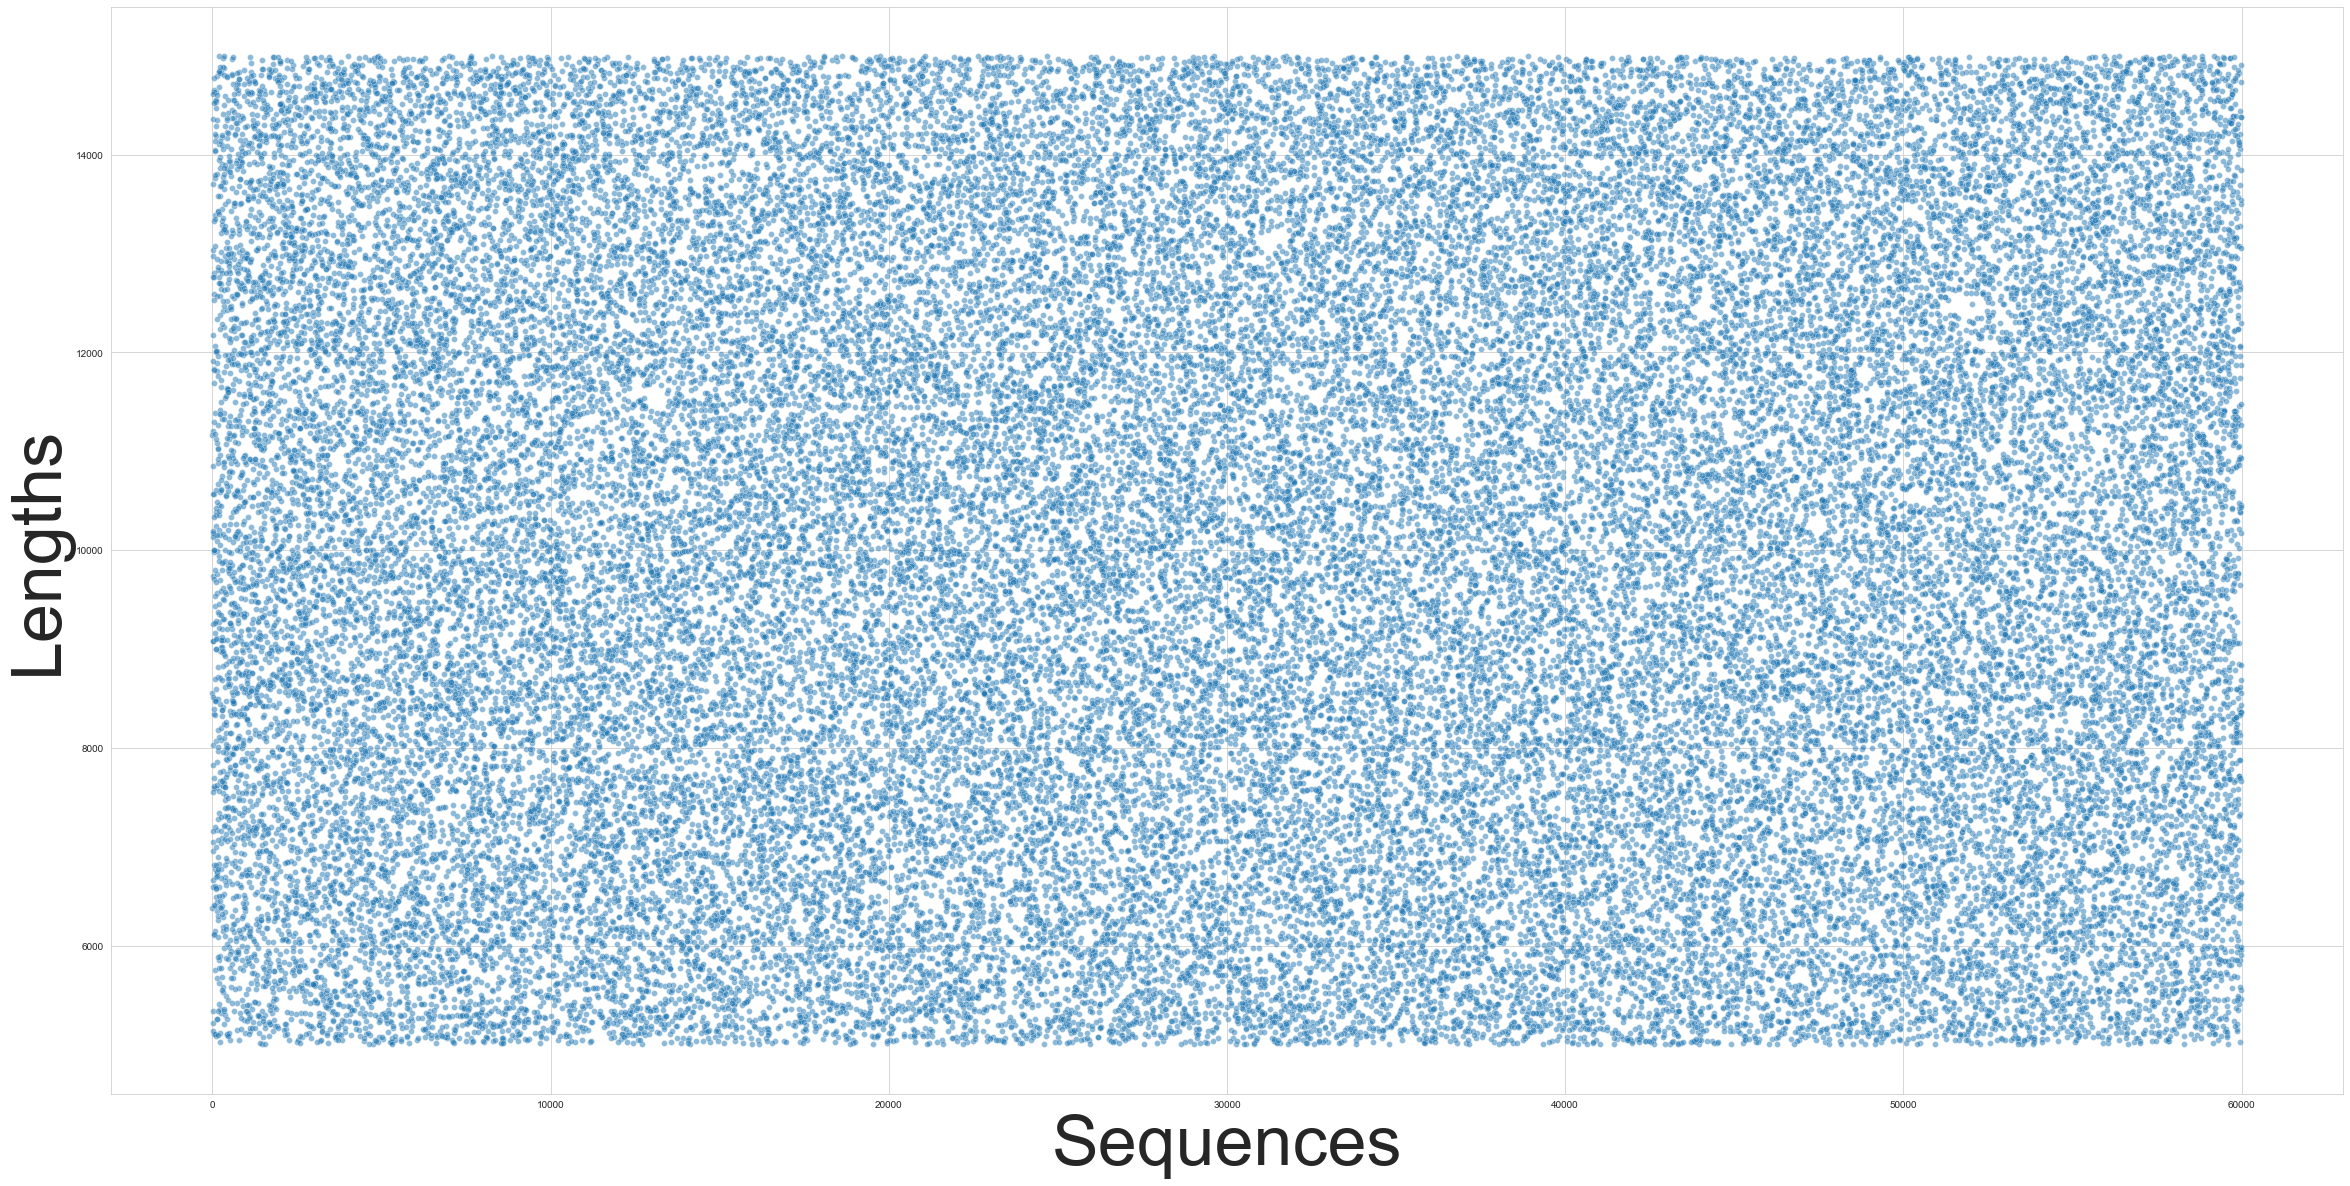

In [44]:
###############################################################################
#                                scatter Plot:                                #
###############################################################################
plt.figure(figsize=(40,20))
b = sns.scatterplot(data=lengths['len'].sample(60000),alpha=0.5)
b.set_xlabel("Sequences",fontsize=70)
b.set_ylabel("Lengths",fontsize=70)
# plt.setp( fontsize=20)
# sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
gene_lengths = gene_coords.iloc[:, 2]-gene_coords.iloc[:, 1]
sns.distplot(gene_lengths)
plt.title("Distribution of Gene Lengths", fontsize = 20)
plt.xlabel("Lengths of Genes", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()